### Diabetes Predicion

https://www.kaggle.com/c/competicao-dsa-machine-learning-jan-2019

In [1]:
import collections
import graphviz
import imblearn
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings

from IPython.display import Image
from imblearn.over_sampling import SMOTE, ADASYN
from pprint import pprint
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(
            'aux/datasets/diabetes.csv', 
            header = None,
            sep = ',',
            names = [
                'Pregnancy', 
                'Glucose', 
                'BloodPressure',
                'SkinfoldThickness',
                'Insulin', 
                'BodyMassIndex', 
                'DiabetesPedigreeFunction', 
                'Age', 
                'Class']
        )   

In [3]:
data.head(5)

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinfoldThickness         768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BodyMassIndex             768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
data.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data[data.isnull().any(axis = 1)] 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class


In [7]:
data.isnull().values.any() 

False

### Exploratory Analysis

**All Data Plot**

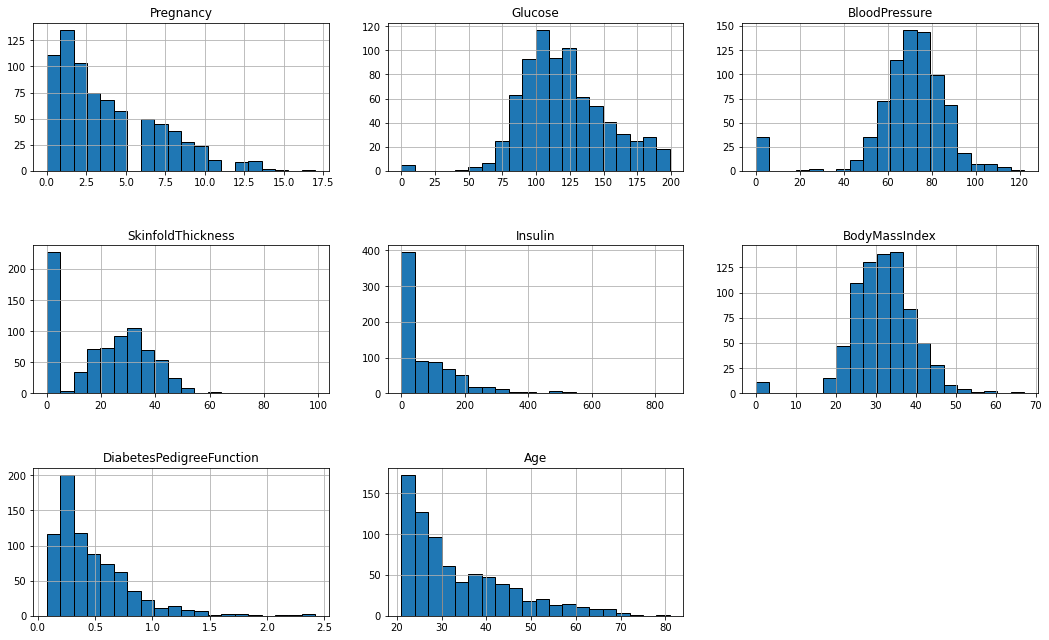

In [8]:
columns = data.columns[:8]
plt.subplots(figsize = (18,15))
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    data[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)

plt.show()

**Diabetes Cases Plot**

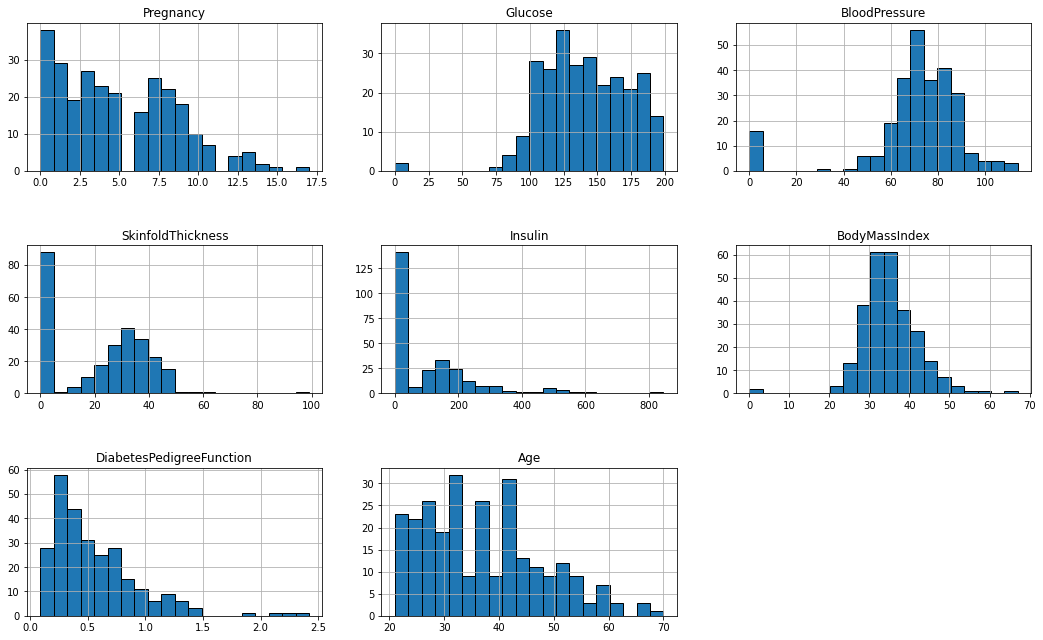

In [9]:
diabetes = data[data['Class'] == 1]
columns = data.columns[:8]
plt.subplots(figsize = (18,15))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
    diabetes[i].hist(bins = 20,edgecolor = 'black')
    plt.title(i)

plt.show()

**Boxplots**

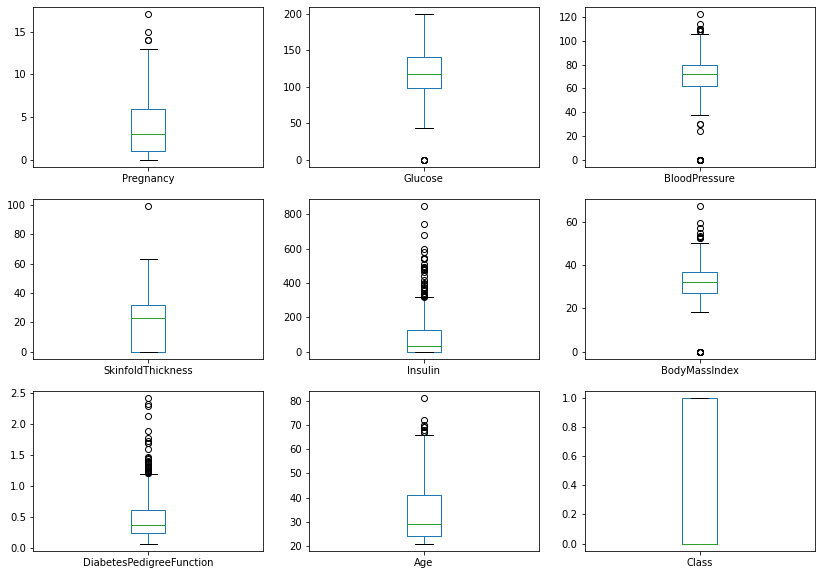

In [10]:
data.plot(kind = 'box', subplots = True, layout = (3, 3), figsize = (14, 10));

**Class Frequency**

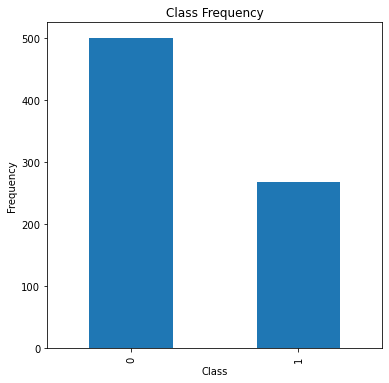

In [11]:
data['Class'].value_counts().plot(kind = 'bar', figsize = (6,6))
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Attributes Relationship

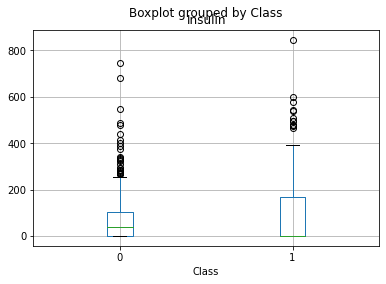

In [12]:
data.boxplot(column = 'Insulin', by ='Class')
plt.show()

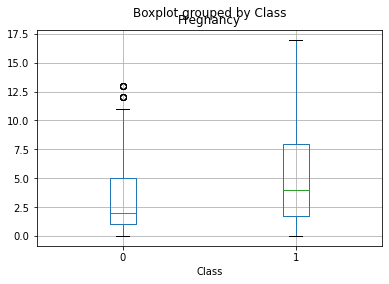

In [13]:
data.boxplot(column = 'Pregnancy', by = 'Class')
plt.show()

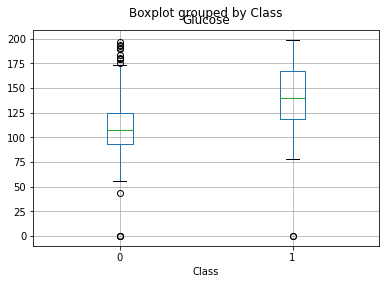

In [14]:
data.boxplot(column = 'Glucose', by = 'Class')
plt.show()

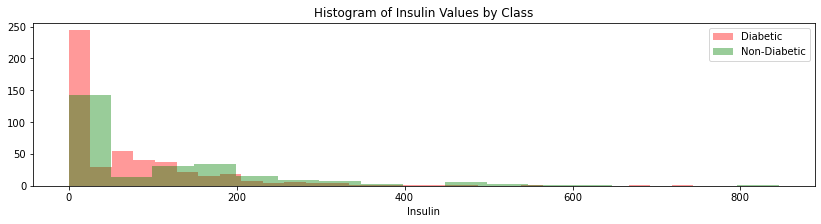

In [15]:
plt.figure(figsize = (14,3))

dataInsulin = data.groupby(data['Insulin']).Class.count().reset_index()
sns.distplot(data[data.Class == 0]['Insulin'], color = 'red',   kde = False, label = 'Diabetic')
sns.distplot(data[data.Class == 1]['Insulin'], color = 'green', kde = False, label = 'Non-Diabetic')

plt.legend()
plt.title('Histogram of Insulin Values by Class')
plt.show()

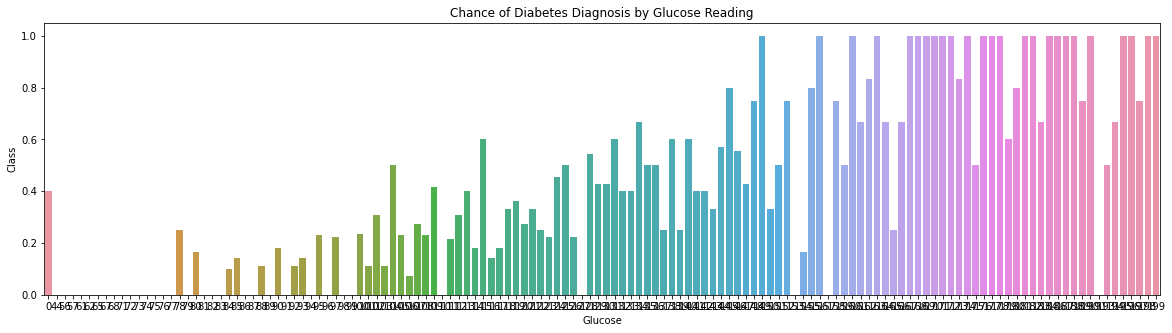

In [16]:
plt.figure(figsize = (20,5))

dataGlucose = data.groupby('Glucose').Class.mean().reset_index()
sns.barplot(dataGlucose.Glucose, dataGlucose.Class)

plt.title('Chance of Diabetes Diagnosis by Glucose Reading')
plt.show()

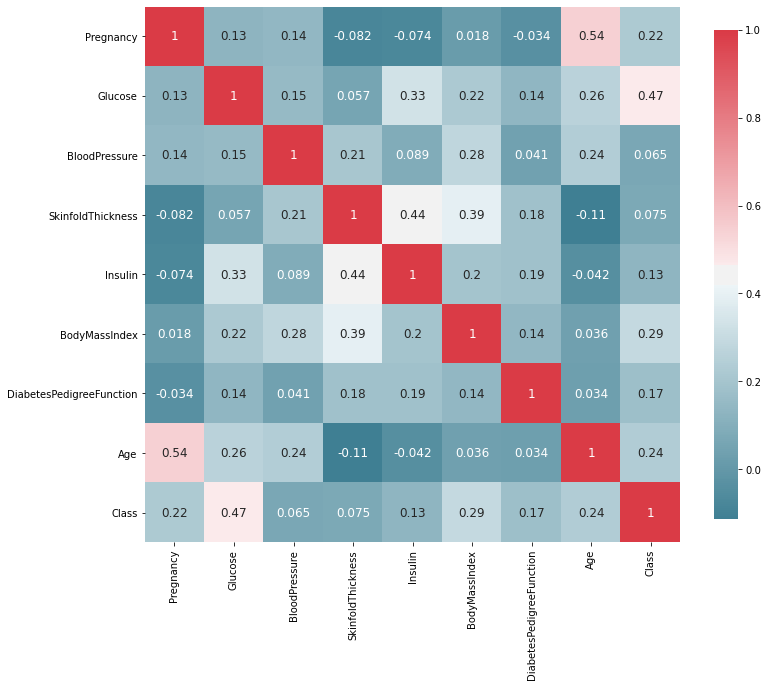

In [17]:
corr = data.corr()
_ , ax = plt.subplots(figsize = (12, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)
_ = sns.heatmap(
    corr, 
    cmap = cmap, 
    square = True, 
    cbar_kws = {'shrink': .9}, 
    ax = ax, 
    annot = True, 
    annot_kws = {'fontsize' : 12}
)

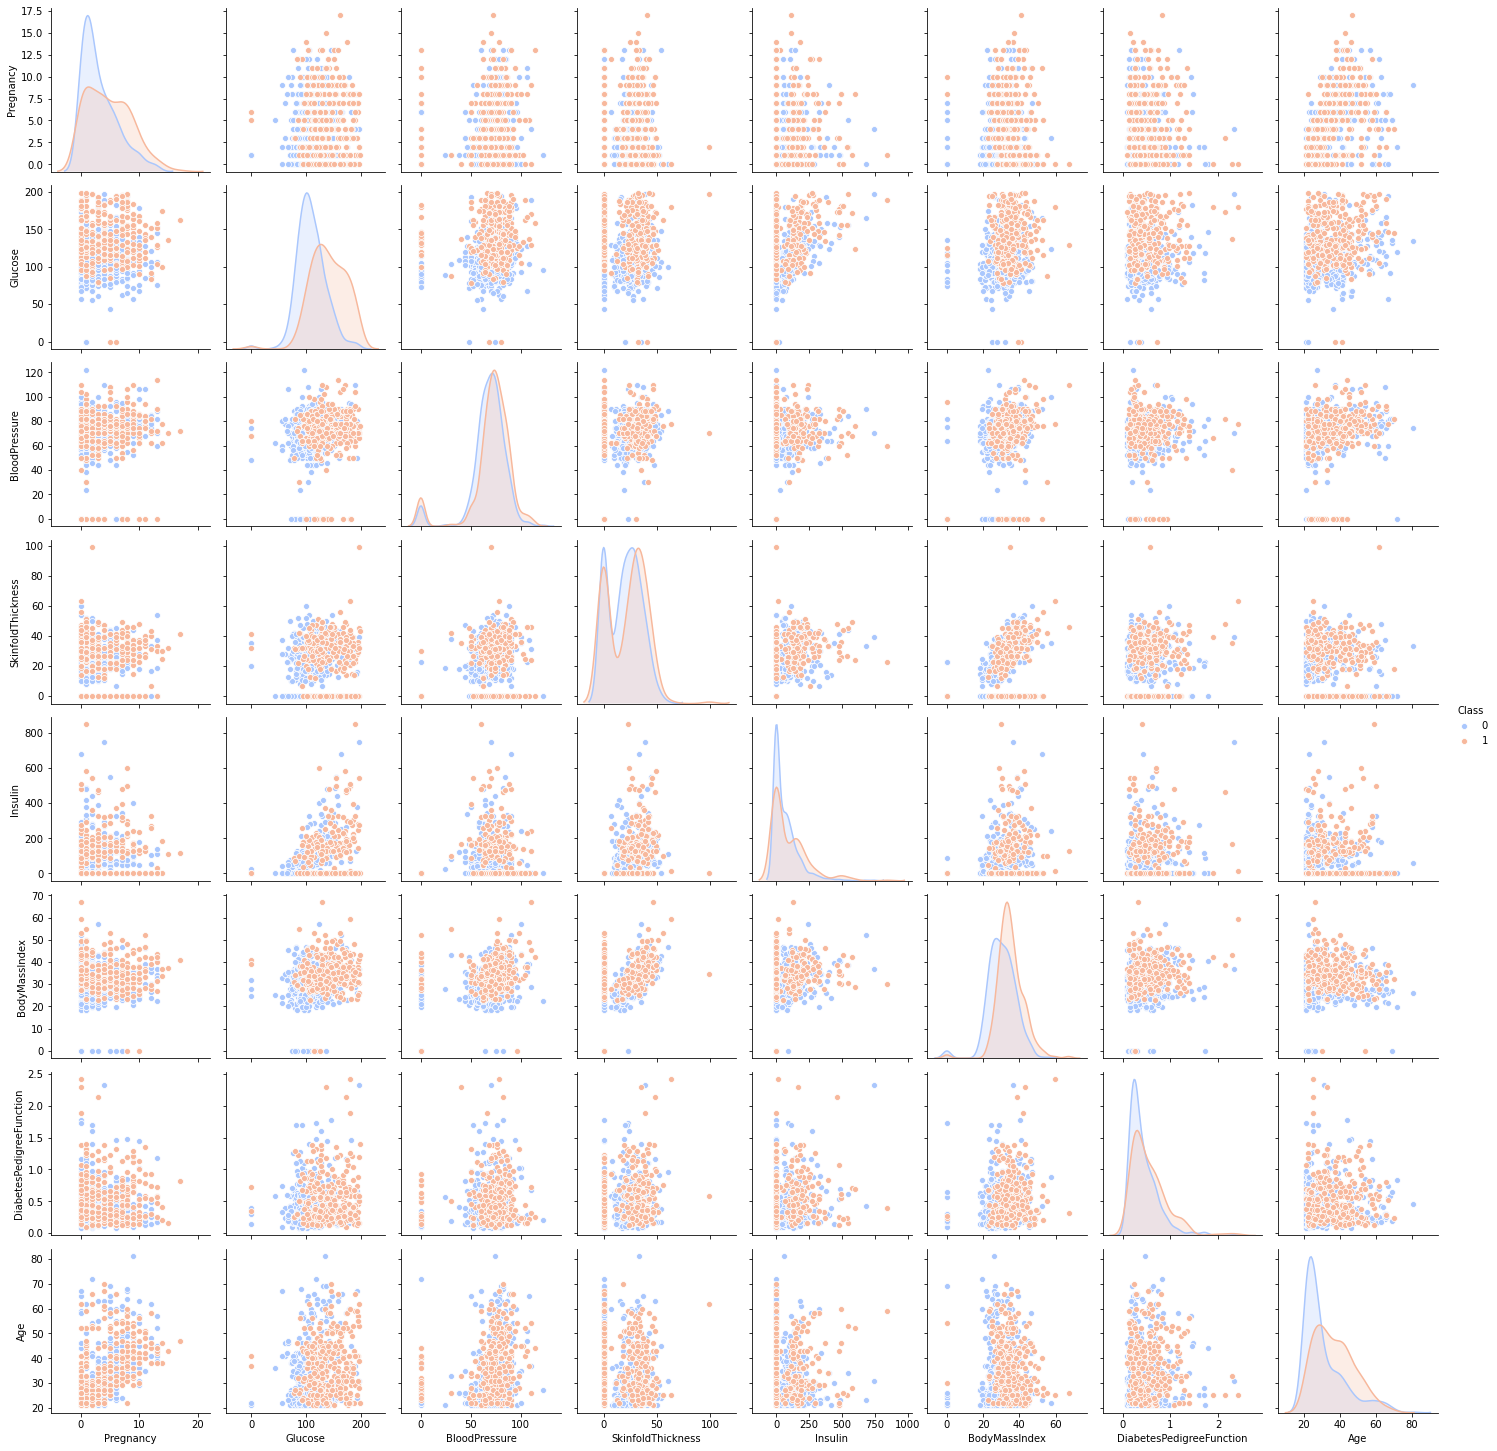

In [18]:
sns.pairplot(data, hue = 'Class', palette = 'coolwarm');

### Data Cleaning

In [19]:
print(f'Glucose Missing Values: {repr(data[data.Glucose == 0].shape[0])}')
print(data[data.Glucose == 0].groupby('Class')['Class'].count())

Glucose Missing Values: 5
Class
0    3
1    2
Name: Class, dtype: int64


In [20]:
glucoseZero = data[(data['Glucose']== 0)]

data[(data['Glucose'] == 0) & (data['Class'] == 0)] = \
    glucoseZero[glucoseZero['Class'] == 0].replace(0, data[(data['Class'] == 0)].mean())

data[(data['Glucose'] == 0) & (data['Class'] == 1)] = \
    glucoseZero[glucoseZero['Class'] == 1].replace(0, data[(data['Class'] == 1)].mean())

In [21]:
print(f'BloodPressure Missing Values: {repr(data[data.BloodPressure == 0].shape[0])}')
print(data[data.BloodPressure == 0].groupby('Class')['Class'].count())

BloodPressure Missing Values: 35
Class
0    19
1    16
Name: Class, dtype: int64


In [22]:
bloodPressureZero = data[(data['BloodPressure'] == 0)]

data[(data['BloodPressure'] == 0) & (data['Class'] == 0)] = \
    bloodPressureZero[bloodPressureZero['Class'] == 0].replace(0, data[(data['Class'] == 0)].mean())

data[(data['BloodPressure'] == 0) & (data['Class'] == 1)] = \
    bloodPressureZero[bloodPressureZero['Class'] == 1].replace(0, data[(data['Class'] == 1)].mean())

In [23]:
print(f'SkinfoldThickness Missing Values: {repr(data[data.SkinfoldThickness == 0].shape[0])}')
print(data[data.SkinfoldThickness == 0].groupby('Class')['Class'].count())

SkinfoldThickness Missing Values: 194
Class
0    121
1     73
Name: Class, dtype: int64


In [24]:
skinfoldThicknessZero = data[(data['SkinfoldThickness']== 0)]

data[(data['SkinfoldThickness'] == 0) & (data['Class'] == 0)] = \
    skinfoldThicknessZero[skinfoldThicknessZero['Class']== 0].replace(0, data[(data['Class'] == 0)].mean())
data[(data['SkinfoldThickness'] == 0) & (data['Class'] == 1)] = \
    skinfoldThicknessZero[skinfoldThicknessZero['Class']== 1].replace(0, data[(data['Class'] == 1)].mean())

In [25]:
print(f'Skin Folds Thickness Abnormal Cases: {repr(data[data.SkinfoldThickness > 60].shape[0])}')
print(data[data.SkinfoldThickness > 60]['SkinfoldThickness'])
print(data[data.SkinfoldThickness > 60].groupby('Class')['Class'].count())

Skin Folds Thickness Abnormal Cases: 2
446    63.0
580    99.0
Name: SkinfoldThickness, dtype: float64
Class
1    2
Name: Class, dtype: int64


In [26]:
data['SkinfoldThickness'].iloc[579] = data['SkinfoldThickness'].mean()

In [27]:
print(f'Insulin Missing Values: {repr(data[data.Insulin == 0].shape[0])}')
print(data[data.Insulin == 0].groupby('Class')['Class'].count())

Insulin Missing Values: 141
Class
0    94
1    47
Name: Class, dtype: int64


In [28]:
insulinZero = data[(data['Insulin'] == 0)]

data[(data['Insulin'] == 0) & (data['Class'] == 0)] = \
    insulinZero[insulinZero['Class']== 0].replace(0, data[(data['Class'] == 0)].mean())
data[(data['Insulin'] == 0) & (data['Class'] == 1)] = \
    insulinZero[insulinZero['Class']== 1].replace(0, data[(data['Class'] == 1)].mean())

In [29]:
print(f'BodyMassIndex Missing Values: {repr(data[data.BodyMassIndex == 0].shape[0])}')
print(data[data.BodyMassIndex == 0].groupby('Class')['Class'].count())

BodyMassIndex Missing Values: 1
Class
0    1
Name: Class, dtype: int64


In [30]:
bodyMassIndexZero = data[(data['BodyMassIndex'] == 0)]

data[(data['BodyMassIndex'] == 0) & (data['Class'] == 0)] = \
    bodyMassIndexZero[bodyMassIndexZero['Class']== 0].replace(0, data[(data['Class'] == 0)].mean())
data[(data['BodyMassIndex'] == 0) & (data['Class'] == 1)] = \
    bodyMassIndexZero[bodyMassIndexZero['Class']== 1].replace(0, data[(data['Class'] == 1)].mean())

In [31]:
data.describe() 

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.126263,121.691999,72.267826,26.770604,124.771038,32.441053,0.471876,33.240885,0.348958
std,3.202732,30.461151,12.115948,9.144460,91.935806,6.880054,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.371904,71.691720,27.500000,0.243750,24.000000,0.000000
50%,3.324384,117.000000,72.000000,23.404712,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,136.297569,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


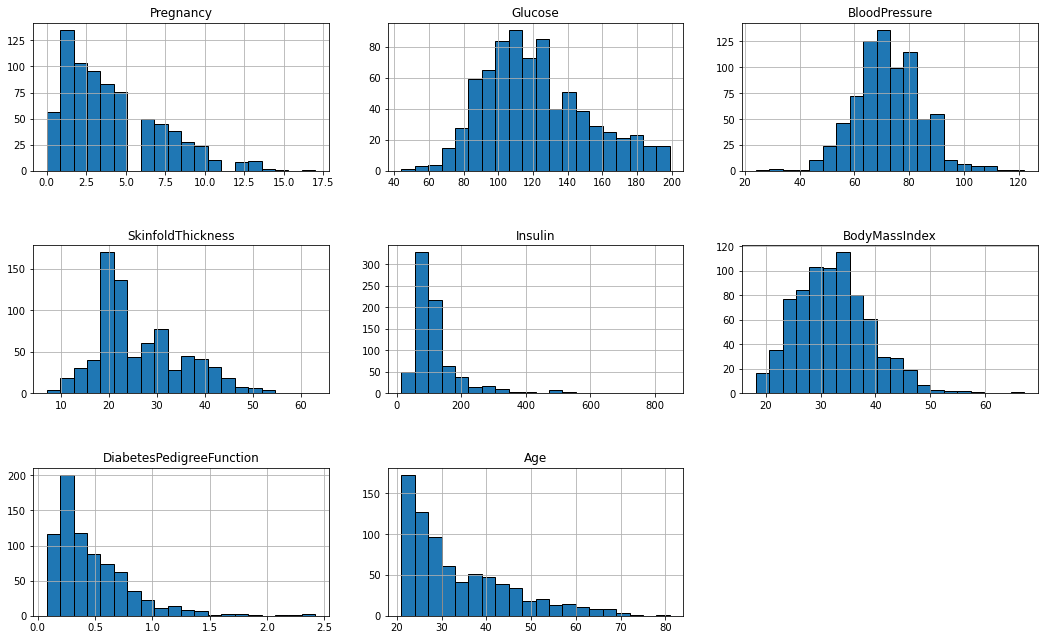

In [32]:
columns = data.columns[:8]
plt.subplots(figsize = (18, 15))
length = len(columns)

for i,j in zip(columns, range(length)):
    plt.subplot((length / 2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    data[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)

plt.show()

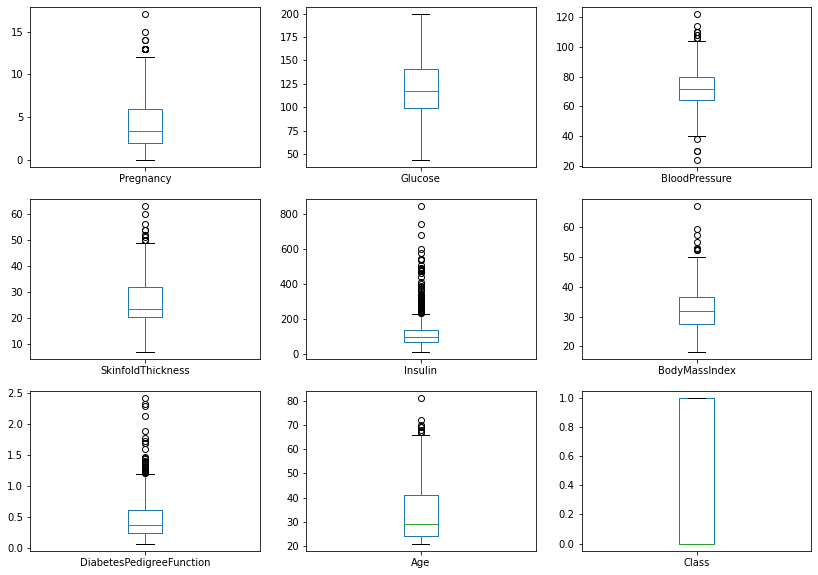

In [33]:
data.plot(kind = 'box', subplots = True, layout = (3, 3), figsize = (14,10));

### Data Modeling

In [34]:
data.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [35]:
random_state = 12342

In [36]:
np.random.seed(75)

**Oversampling data are indicated with an 'o' suffix**

In [37]:
data_o, target_o = SMOTE().fit_sample(data, data.Class)

In [38]:
data_o.shape

(1000, 9)

In [39]:
target_o.shape

(1000,)

In [40]:
collections.Counter(target_o)

Counter({1: 500, 0: 500})

In [41]:
xTraining_o, xTest_o, yTraining_o, yTest_o = train_test_split(data_o, target_o, test_size = 0.20, random_state = 4)

In [42]:
xTraining_o.shape

(800, 9)

In [43]:
yTraining_o.shape

(800,)

In [44]:
xTest_o.shape

(200, 9)

In [45]:
yTest_o.shape

(200,)

In [46]:
dataCols = data[data.columns[:8]]

In [47]:
target = data['Class']

In [48]:
scaler = MinMaxScaler()
cols = dataCols.iloc[:, 0:8].columns
dataCols[cols] = scaler.fit_transform(dataCols)

dataCols.head()

,Pregnancy,Glucose,BloodPressure,SkinfoldThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age
1,0.352941,0.670968,0.489796,0.500000,0.146992,0.314928,0.234415,0.483333
2,0.058824,0.264516,0.428571,0.392857,0.090194,0.171779,0.116567,0.166667
3,0.470588,0.896774,0.408163,0.292941,0.111922,0.104294,0.253629,0.183333
4,0.058824,0.290323,0.428571,0.285714,0.096154,0.202454,0.038002,0.000000
5,0.000000,0.600000,0.163265,0.500000,0.185096,0.509202,0.943638,0.200000


In [49]:
# dataCols[cols] = preprocessing.scale(dataCols)

In [50]:
training, test = train_test_split(data, test_size = 0.20, random_state = 437, stratify = data['Class'])

xTraining = training[training.columns[:8]]
xTest     = test[test.columns[:8]]
yTraining = training['Class']
yTest     = test['Class']

### K-Nearest Neighbours Classifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [52]:
knn.fit(xTraining_o, yTraining_o)

KNeighborsClassifier(n_neighbors=3)

In [53]:
pred = knn.predict(xTest_o)

In [54]:
pred.shape

(200,)

In [55]:
print(confusion_matrix(yTest_o, pred))

[[81 22]
 [ 9 88]]


In [56]:
print(classification_report(yTest_o, pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.80      0.91      0.85        97

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



### Normalization

In [57]:
data_on = preprocessing.scale(data_o)

In [58]:
xTraining_on, xTest_on, yTraining_on, yTest_on = \
    train_test_split(data_on, target_o, test_size = 0.20, random_state = 4)

In [59]:
knn.fit(xTraining_on, yTraining_on)

KNeighborsClassifier(n_neighbors=3)

In [60]:
pred = knn.predict(xTest_on)

In [61]:
print(confusion_matrix(yTest_on, pred))

[[102   1]
 [  0  97]]


In [62]:
print(classification_report(yTest_on, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      1.00      0.99        97

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



### K-Value Optimization

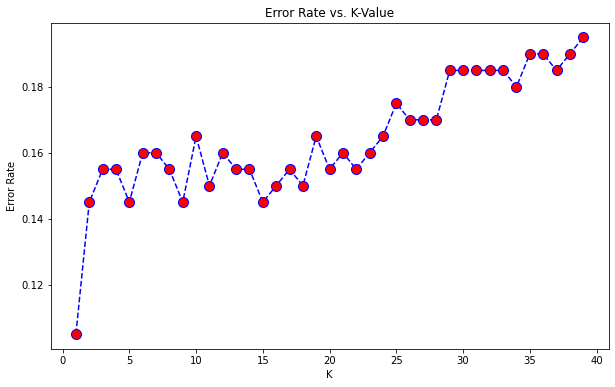

In [63]:
errorRate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xTraining_o, yTraining_o)
    iPred = knn.predict(xTest_o)
    errorRate.append(np.mean(iPred != yTest_o))

plt.figure(figsize = (10, 6))
plt.plot(
    range(1,40), 
    errorRate, 
    color = 'blue', 
    linestyle = 'dashed', marker = 'o', 
    markerfacecolor = 'red', 
    markersize = 10
)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

**Weight function used in the prediction. Possible values:**

- Uniform: uniform weights. All points in each neighborhood are weighted equally.
- Distance: data points weighted by the inverse of the distance. In this case, neighbors closest to a consultation point will have a greater influence than neighbors more distant.
- Callable: a user-defined function that accepts a distance matrix and returns a matrix in the same way that it contains weights.
- Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1) and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [64]:
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
knn.fit(xTraining_o, yTraining_o)
pred = knn.predict(xTest_o)

cm_knn = confusion_matrix(yTest_o, pred)
print('With k = 1. Confusion Matrix:')
print(cm_knn)

rpt_knn = classification_report(yTest_o, pred)
print(rpt_knn)

With k = 1. Confusion Matrix:
[[89 14]
 [ 2 95]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       103
           1       0.87      0.98      0.92        97

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200



### Resource selection using the Hill Climbing method

In [65]:
newInd = []

In [66]:
curMaxScore = 0.0

In [67]:
colNum = 8

In [68]:
colIndRandom = shuffle(range(0, colNum), random_state = 13)

In [69]:
for curF in range(0, colNum):
    newInd.append(colIndRandom[curF])
    newData = data.values[:, newInd]
    xTraining_s, xTest_s, yTraining_s, yTest_s = \
        train_test_split(newData, target, test_size = 0.2, random_state = 1987)
    clf = KNeighborsClassifier(1)
    fit = clf.fit(xTraining_s, yTraining_s)
    curScore = clf.score(xTest_s, yTest_s)
    
    if curScore < curMaxScore:
        newInd.remove(colIndRandom[curF])
    else:
        curMaxScore = curScore
        print(f'Score with {len(newInd)} selected attributes: {curScore}')

Score with 1 selected attributes: 0.6363636363636364
Score with 2 selected attributes: 0.8311688311688312
Score with 3 selected attributes: 0.8376623376623377
Score with 4 selected attributes: 0.8376623376623377
Score with 5 selected attributes: 0.8376623376623377
Score with 6 selected attributes: 0.8376623376623377


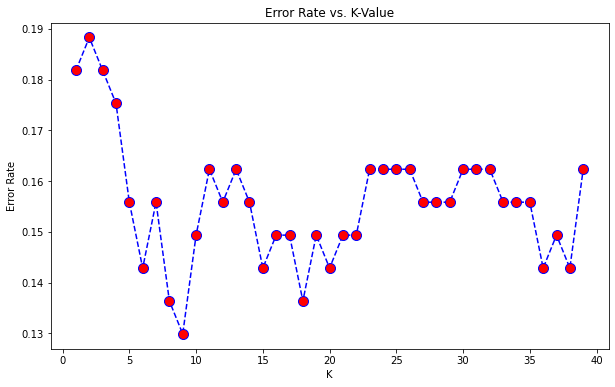

In [70]:
errorRate = []
randomState = 19

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xTraining_s, yTraining_s)
    iPred = knn.predict(xTest_s)
    errorRate.append(np.mean(iPred != yTest_s))

plt.figure(figsize = (10, 6))
plt.plot(
    range(1, 40),
    errorRate,
    color = 'blue', 
    linestyle = 'dashed', 
    marker = 'o',
    markerfacecolor = 'red', 
    markersize = 10
)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [71]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', p = 1)
knn.fit(xTraining_s, yTraining_s)
pred = knn.predict(xTest_s)

cm_knn = confusion_matrix(yTest_s, pred)
print('With k = 32. Confusion Matrix:')
print(cm_knn)

rpt_knn = classification_report(yTest_s, pred)
print(rpt_knn)

With k = 32. Confusion Matrix:
[[91 10]
 [10 43]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       101
           1       0.81      0.81      0.81        53

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



### KNN without SMOTE

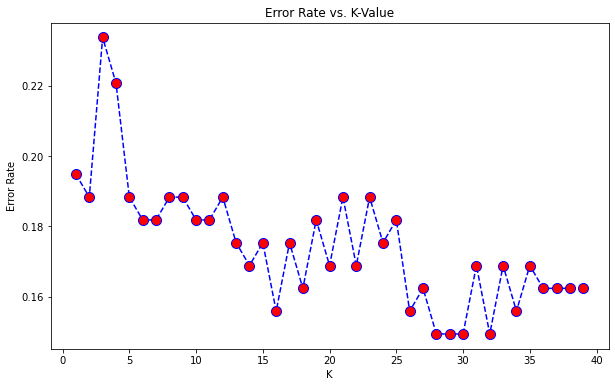

In [72]:
errorRate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xTraining, yTraining)
    iPred = knn.predict(xTest)
    errorRate.append(np.mean(iPred != yTest))

plt.figure(figsize = (10, 6))
plt.plot(
    range(1, 40),
    errorRate,
    color = 'blue', 
    linestyle = 'dashed', 
    marker = 'o',
    markerfacecolor = 'red', 
    markersize = 10
)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [73]:
knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance', p = 1)
knn.fit(xTraining, yTraining)
pred = knn.predict(xTest)

cm_knn = confusion_matrix(yTest, pred)
print('With k = 31. Confusion Matrix:')
print(cm_knn)

rpt_knn = classification_report(yTest, pred)
print(rpt_knn)

With k = 31. Confusion Matrix:
[[86 14]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       100
           1       0.77      0.85      0.81        54

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154



## Decision Tree Classifier

In [74]:
randomState = 234

In [75]:
dtc = DecisionTreeClassifier(random_state = 998)

In [76]:
dtc.fit(xTraining, yTraining)

DecisionTreeClassifier(random_state=998)

In [77]:
pred = dtc.predict(xTest)

In [78]:
print(f'Decision Tree Classifier Algorithm Accuracy: {metrics.accuracy_score(pred, yTest)}')

Decision Tree Classifier Algorithm Accuracy: 0.8311688311688312


In [79]:
dtc_cm = confusion_matrix(yTest, pred)
print('Confusion Matrix:')
print(dtc_cm)

dtc_rpt = classification_report(yTest, pred)
print(dtc_rpt)

Confusion Matrix:
[[86 14]
 [12 42]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       100
           1       0.75      0.78      0.76        54

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154



In [80]:
dotData = \
    tree.export_graphviz( \
        dtc, 
        out_file = 'tree.dot',
        filled = True,
        rounded = True,
        special_characters = True
    ) 

In [81]:
featureNames = data.copy().iloc[:, 0:8].columns

In [82]:
targetNames = ['Yes', 'No']

In [83]:
gvData = \
    export_graphviz( \
        dtc,
        out_file = None,
        feature_names = featureNames,
        class_names = targetNames,
        filled = True, 
        rounded = True, 
        special_characters = True
    )

In [84]:
graph = graphviz.Source(gvData)

In [85]:
graph.format = 'png'

In [86]:
graph.view(filename = 'tree', directory = 'aux/images/');

## Random Forest Classifier

In [87]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)

In [88]:
rfc.fit(xTraining, yTraining)

RandomForestClassifier(max_depth=5, random_state=42)

In [89]:
pred = rfc.predict(xTest)

In [90]:
rfc_cm = confusion_matrix(yTest, pred)
print('Confusion Matrix:')
print(rfc_cm)

rfc_rpt = classification_report(yTest, pred)
print(rfc_rpt)

Confusion Matrix:
[[91  9]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       100
           1       0.84      0.91      0.88        54

    accuracy                           0.91       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



In [91]:
features = [col for col in list(xTraining)]

In [92]:
print(f'{len(features)} features:')
print(features)

8 features:
['Pregnancy', 'Glucose', 'BloodPressure', 'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'DiabetesPedigreeFunction', 'Age']


### Finding most important features to predict the target variable

In [93]:
importances = rfc.feature_importances_

In [94]:
descendingIndices = np.argsort(importances)[::-1]

In [95]:
importancesSorted = [importances[idx] for idx in descendingIndices]

In [96]:
featuresSorted = [features[idx] for idx in descendingIndices]

In [97]:
print(f'Most importante feature: {featuresSorted[0]}')

Most importante feature: Insulin


In [98]:
def plotImportances(xTraining, featuresSorted, importancesSorted):
    
    align = 'center'
    barColor = 'lightblue'
    fontSize = 14
    label = '__nolegend__'
    
    ax = plt.bar(range(xTraining.shape[1]), importancesSorted, color = barColor, align = align, label = label)
    ax = plt.xticks(range(xTraining.shape[1]), featuresSorted, rotation = 90)
    ax = plt.xlim([-1, xTraining.shape[1]])
    ax = plt.ylabel('Features Importance', fontSize = fontSize)
    ax = plt.tick_params('both', length = 6, width = 1.5, which = 'major', right = True, top = True)
    ax = plt.xticks(fontsize = fontSize)
    ax = plt.yticks(fontsize = fontSize)
    ax = plt.tight_layout()
    
    return ax

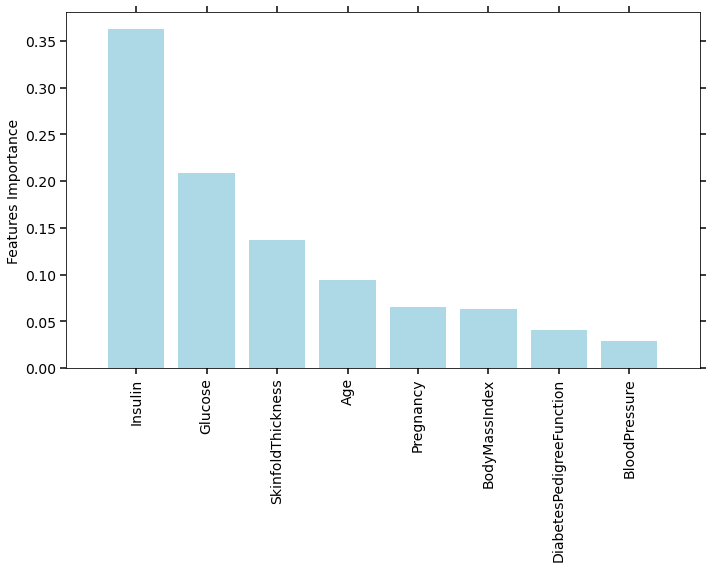

In [99]:
fig1 = plt.figure(1, figsize = (10, 8))
ax = plotImportances(xTraining, featuresSorted, importancesSorted)

### Models Comparison

In [100]:
results = []

In [101]:
classifiers = ['Decision Tree', 'Random Forest', 'KNN', 'KNN (SMOTE)']

In [102]:
models = [
    DecisionTreeClassifier(random_state = 998),
    RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42),
    KNeighborsClassifier(n_neighbors = 6),
    'SMOTE'
]

In [103]:
for model in models:
    if model == 'SMOTE':
        model = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
        model.fit(xTraining_o, yTraining_o)
        pred = model.predict(xTest_o)
        
        results.append(metrics.accuracy_score(pred, yTest_o))
    else:
        model.fit(xTraining, yTraining)
        pred = model.predict(xTest)
        
        results.append(metrics.accuracy_score(pred, yTest))

In [104]:
dfModels = pd.DataFrame(results, index = classifiers)

In [105]:
dfModels.columns = ['Accuracy']

In [106]:
dfModels

,Accuracy
Decision Tree,0.831169
Random Forest,0.909091
KNN,0.818182
KNN (SMOTE),0.920000


**Using only the most important features**

In [107]:
dataByClass = data[['Pregnancy', 'Glucose', 'SkinfoldThickness', 'Insulin', 'BodyMassIndex', 'Age', 'Class']]

In [108]:
training, test = \
    train_test_split(dataByClass, test_size = 0.20, random_state = 437, stratify = dataByClass['Class'])

In [109]:
xTraining = training[training.columns[:6]]

In [110]:
xTest = test[test.columns[:6]]

In [111]:
yTraining = training['Class']

In [112]:
yTest = test['Class']

In [113]:
np.random.seed(795)

In [114]:
smoteDate, smoteTarget = SMOTE().fit_sample(dataByClass, dataByClass.Class)

In [115]:
xTraining_o, xTest_o, yTraining_o, yTest_o = \
    train_test_split(smoteDate, smoteTarget, test_size = 0.20, random_state = 4)

In [116]:
results = []

In [117]:
for model in models:
    if model == 'SMOTE':
        model = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
        model.fit(xTraining_o, yTraining_o)
        pred = model.predict(xTest_o)
        
        results.append(metrics.accuracy_score(pred, yTest_o))
    else:
        model.fit(xTraining, yTraining)
        pred = model.predict(xTest)    
        
        results.append(metrics.accuracy_score(pred, yTest))

In [118]:
dfModels = pd.DataFrame(results, index = classifiers)

In [119]:
dfModels.columns = ['Accuracy']

In [120]:
dfModels

,Accuracy
Decision Tree,0.850649
Random Forest,0.902597
KNN,0.850649
KNN (SMOTE),0.875000


## Cross Validation

In [121]:
kfold = KFold(n_splits = 10, random_state = 998) 

In [122]:
results = []

In [123]:
accuracy = []

In [124]:
classifiers = ['KNN', 'KNN (SMOTE)', 'Decision Tree', 'Random Forest']

In [125]:
models = [
    KNeighborsClassifier(n_neighbors = 6),
    'SMOTE',
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 938)
]

In [126]:
for model in models:
    if model == 'SMOTE':
        model = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', p = 1)
        resultCV = cross_val_score(model, data_o, target_o, cv = kfold, scoring = 'accuracy')
        
        results.append(resultCV.mean())
        accuracy.append(resultCV)
    else:
        resultCV = cross_val_score(model, dataCols, target, cv = kfold, scoring = 'accuracy')
        
        results.append(resultCV.mean())
        accuracy.append(resultCV)

In [127]:
dfModelsCV = pd.DataFrame(results, index = classifiers)

In [128]:
dfModelsCV.columns = ['CV Mean']

In [129]:
dfModelsCV

,CV Mean
KNN,0.753794
KNN (SMOTE),0.909000
Decision Tree,0.802085
Random Forest,0.871138


In [130]:
box = pd.DataFrame(accuracy, index = [classifiers])

In [137]:
fig3 = plt.figure(1, figsize = (12, 8))

<Figure size 864x576 with 0 Axes>

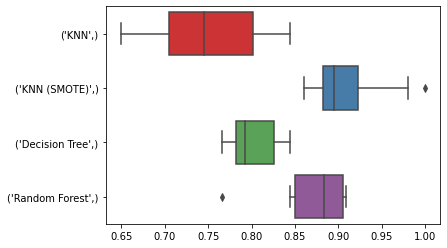

In [138]:
sns.boxplot(data = box.T, orient = 'h', palette = 'Set1');

### Random Forest Parameter Tuning

**Parameters currently in use:**

In [167]:
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


**Trees number in random forest**

In [143]:
nEstimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

**Resources number to be considered in each division**

In [145]:
maxFeatures = ['auto', 'sqrt']

**Tree maximum levels number** 

In [146]:
maxDepth = [int(x) for x in np.linspace(10, 110, num = 11)]

In [148]:
maxDepth.append(None)

**Samples minimum number needed to split a node**

In [150]:
minSamplesSplit = [2, 5, 10]

**Samples minimum number required at each leaf node**

In [151]:
minSamplesLeaf = [1, 2, 4]

**Sample selection method to train each tree**

In [153]:
bootstrap = [True, False]

**Creating the random grid**

In [162]:
randomGrid = {
    'n_estimators': nEstimators,
    'max_features': maxFeatures,
    'max_depth': maxDepth,
    'min_samples_split': minSamplesSplit,
    'min_samples_leaf': minSamplesLeaf,
    'bootstrap': bootstrap
}

In [163]:
pprint(randomGrid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


**Using the random grid to find the best hyperparameters**

In [164]:
rfc = RandomForestClassifier()

**Random parameter search, using 3-fold cross-validation, in 100 different combinations, with all cores available**

In [165]:
rfcRandom = \
    RandomizedSearchCV(
        estimator = rfc, 
        param_distributions = randomGrid, 
        n_iter = 100, 
        cv = 3, 
        verbose = 2,
        random_state = 42,
        n_jobs = -1
)

**Fit**

In [166]:
rfcRandom.fit(xTraining, yTraining)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [168]:
rfcRandom.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [185]:
def getAccuracy(model, xTest, yTest):
    predictions = model.predict(xTest)
    errors = abs(predictions - yTest)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    
    print('Model Performance')
    print('Average Error: {:.4f} degrees'.format(np.mean(errors)))
    print('Accuracy: {:.2f}%'.format(accuracy))
    
    return accuracy

In [182]:
baseModel = RandomForestClassifier(random_state = 82)

In [183]:
baseModel.fit(xTraining, yTraining)

RandomForestClassifier(random_state=82)

In [187]:
baseAccuracy = getAccuracy(baseModel, xTest, yTest)

Model Performance
Average Error: 0.1169 degrees
Accuracy: 88.31%


In [188]:
bestRandom = rfcRandom.best_estimator_

In [189]:
randomAccuracy = getAccuracy(bestRandom, xTest, yTest)

Model Performance
Average Error: 0.1234 degrees
Accuracy: 87.66%


In [194]:
improvedAccuracy = 100 * (randomAccuracy - baseAccuracy) / baseAccuracy * -1

In [195]:
print('Improvement of {:.2f}%'.format(improvedAccuracy))

Improvement of 0.74%


# Tuning de Parâmetros Para Decision Tree

In [ ]:
print('Parâmetros atualmente em uso:\n')
pprint(dtree.get_params())

In [ ]:
# Número de recursos a serem considerados em cada divisão
max_features = ['auto', 'sqrt']

# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# Número mínimo de amostras requeridas em cada nó da folha
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Método de seleção de amostras para treinar cada árvore
bootstrap = [True, False]

random_state=294

# Cria o random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

In [ ]:
# Use random grid para procurar os melhores hiperparâmetros
# Primeiro crie o modelo básico para ajustar
dtree = DecisionTreeClassifier()
random_state=194

# Pesquisa aleatória de parâmetros, usando validação cruzada de 3
# Pesquisar em 100 combinações diferentes e usar todos os núcleos disponíveis
dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=294, n_jobs = -1)

# Fit
dtree_random.fit(X_train, y_train)


In [ ]:
dtree_random.best_params_

In [ ]:
base_model =  DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,random_state=474)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
pprint(base_model.get_params())

In [ ]:
best_dtree_random = dtree_random.best_estimator_
best_dtree_random.fit(X_train, y_train)
random_accuracy = evaluate(best_dtree_random, X_test, y_test)

In [ ]:
print('Melhora de {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
best_dtree_random

In [ ]:
dot_data = tree.export_graphviz(best_dtree_random, out_file='tree2.dot', 
                         filled=True, rounded=True,  
                         special_characters=True) 

In [ ]:
temp=[]
accuracy=[]
classifiers=['KNN','KNN (SMOTE)','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=6),"SMOTE", best_dtree_random,best_random]
for i in models:
    model = i
    
    if model == "SMOTE":
        model = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
        cv_result = cross_val_score(model,data_o,target_o, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
       
    else:
        cv_result = cross_val_score(model,data,target, cv = kfold,scoring = "accuracy")
        temp.append(cv_result.mean())
        accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(temp,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

In [ ]:
box=pd.DataFrame(accuracy,index=[classifiers])
fig3 = plt.figure(1, figsize=(12,8))
sns.boxplot(data=box.T, orient="h", palette="Set1")
plt.show()

# Fim
# Obrigado
# www.datascienceacademy.com.br